# Project 1 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [68]:
df=pd.read_csv("storesalesdata.csv")
df.head()

,Store,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
0,S0001,1,3,2012,23401.06,5567.90,3930.28,5223.61,4542.28,238.58,2608.78,1651.77,4304.79
1,S0001,2,3,2012,32442.93,8009.52,4712.31,6174.72,9503.45,245.29,2692.72,2688.89,4467.51
2,S0001,3,3,2012,40433.61,9759.20,5969.03,8010.67,12793.92,282.12,3493.85,2929.85,5721.60
3,S0001,4,3,2012,57043.39,13966.26,9008.24,13142.55,16635.77,316.72,5618.55,4270.38,8313.11
4,S0001,5,3,2012,32894.86,7870.66,5448.35,5459.29,8358.96,198.00,3339.59,2061.21,5280.16


In [69]:
#We only need store sales data in Year 2015
Sales_Data=df[df['Year'] == 2015]
Sales_Data.head()

,Store,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
669,S0001,1,1,2015,15851.32,4343.52,2659.79,3273.70,2820.66,111.31,1778.42,1311.56,2870.88
670,S0001,2,1,2015,24726.90,5622.35,3618.33,4361.22,4050.15,52.44,1944.47,1473.97,3805.39
671,S0001,3,1,2015,32463.81,7407.34,6134.92,8888.22,6968.51,119.65,2774.02,2148.35,4148.57
672,S0001,4,1,2015,45526.66,10239.19,8592.09,13102.94,10027.17,91.87,3923.03,3138.57,5915.66
673,S0001,5,1,2015,44492.21,9997.15,7215.28,12757.61,8232.63,169.18,4218.18,2956.71,7570.17


In [70]:
Sales_Data.describe()

,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
count,30933.000000,30933.000000,30933.0,30933.000000,30933.00000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000
mean,15.694533,6.511008,2015.0,35787.146113,8133.17987,6281.555544,8904.617038,8794.389290,661.678786,3275.658499,2200.968333,5950.909211
std,8.794952,3.440839,0.0,14247.292627,3129.06324,2429.098435,4795.789628,3968.845596,857.266105,1655.526800,1004.955878,3025.951078
min,1.000000,1.000000,2015.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,2015.0,25465.790000,5964.73000,4534.490000,5790.390000,5993.590000,288.450000,2121.580000,1479.040000,3789.770000
50%,16.000000,7.000000,2015.0,32897.850000,7528.95000,5829.380000,7810.840000,7975.360000,452.970000,2942.230000,1988.200000,5226.240000
75%,23.000000,10.000000,2015.0,43149.100000,9680.12000,7586.300000,10867.930000,10741.010000,721.670000,4065.710000,2696.250000,7319.110000
max,31.000000,12.000000,2015.0,263224.800000,36901.12000,59747.760000,355587.600000,39769.390000,13773.870000,75606.020000,8791.490000,48480.370000


In [72]:
# group by Team, get mean, min, and max value of Age for each value of Team.

Sum_sales_groupby=Sales_Data.groupby(['Store']).agg({'Dry_Grocery':['sum'], 'Dairy':['sum'], 'Frozen_Food':['sum'], 'Meat':['sum'], 'Produce':['sum'], 'Floral':['sum'], 'Deli':['sum'], 'Bakery':['sum'], 'General_Merchandise':['sum']})
Total_df=Sum_sales_groupby
Total_df['Total Sales']=Total_df['Dry_Grocery']+Total_df['Dairy']+Total_df['Frozen_Food']+Total_df['Meat']+Total_df['Produce']+Total_df['Floral']+Total_df['Deli']+Total_df['Bakery']+Total_df['General_Merchandise']
Total_df['Meat_Sum']=Total_df['Meat']
Total_df['Dry_Grocery_Sum']=Total_df['Dry_Grocery']
Total_df['Deli_Sum']=Total_df['Deli']
Total_df['Bakery_Sum']=Total_df['Bakery']
Total_df['General_Merchandise_Sum']=Total_df['General_Merchandise']
Total_df['Dairy_Sum']=Total_df['Dairy']
Total_df['Frozen_Food_Sum']=Total_df['Frozen_Food']
Total_df['Produce_Sum']=Total_df['Produce']
Total_df['Floral_Sum']=Total_df['Floral']

Total_df=Total_df.drop(['Meat','Deli','Dry_Grocery','Bakery','General_Merchandise','Dairy','Frozen_Food','Produce','Floral'],1)

Total_df['% Meat']=Total_df['Meat_Sum']/Total_df['Total Sales']
Total_df['% Dry_Grocery']=Total_df['Dry_Grocery_Sum']/Total_df['Total Sales']
Total_df['% Deli']=Total_df['Deli_Sum']/Total_df['Total Sales']
Total_df['% Bakery']=Total_df['Bakery_Sum']/Total_df['Total Sales']
Total_df['% General_Merchandise']=Total_df['General_Merchandise_Sum']/Total_df['Total Sales']
Total_df['% Dairy']=Total_df['Dairy_Sum']/Total_df['Total Sales']
Total_df['% Frozen_Food']=Total_df['Frozen_Food_Sum']/Total_df['Total Sales']
Total_df['% Produce']=Total_df['Produce_Sum']/Total_df['Total Sales']
Total_df['% Floral']=Total_df['Floral_Sum']/Total_df['Total Sales']
Total_df.to_csv("Project 1 Data.csv")

In [94]:
Data=pd.read_csv("Project 1 Data.csv")
Data.head()

,Store,Total Sales,Meat_Sum,Dry_Grocery_Sum,Deli_Sum,Bakery_Sum,General_Merchandise_Sum,Dairy_Sum,Frozen_Food_Sum,Produce_Sum,Floral_Sum,% Meat,% Dry_Grocery,% Deli,% Bakery,% General_Merchandise,% Dairy,% Frozen_Food,% Produce,% Floral
0,S0001,23508945.82,2531382.34,10845787.65,1023812.90,835599.06,1590570.68,2423389.38,1814872.88,2284388.70,159142.23,0.107677,0.461347,0.043550,0.035544,0.067658,0.103084,0.077199,0.097171,0.006769
1,S0002,17334619.57,1991807.66,7931072.94,689786.42,514864.68,1111992.45,1844188.83,1366677.52,1755293.15,128935.92,0.114903,0.457528,0.039792,0.029702,0.064149,0.106388,0.078841,0.101259,0.007438
2,S0003,30240661.99,3468989.12,12741875.44,1262874.27,1091930.44,2408831.27,3095321.58,2087437.15,3792143.03,291259.69,0.114713,0.421349,0.041761,0.036108,0.079655,0.102356,0.069027,0.125399,0.009631
3,S0004,27913890.97,3565375.84,12688533.89,1166388.77,962155.82,1606208.31,2710746.38,2240847.44,2802811.88,170822.64,0.127728,0.454560,0.041785,0.034469,0.057542,0.097111,0.080277,0.100409,0.006120
4,S0005,27825886.17,2834435.52,12248085.57,984736.25,629055.94,1874796.88,2957003.74,2402445.89,3648309.02,247017.36,0.101863,0.440169,0.035389,0.022607,0.067376,0.106268,0.086339,0.131112,0.008877


In [95]:
X=Data.drop(['Store'],1)

In [96]:
X

,Total Sales,Meat_Sum,Dry_Grocery_Sum,Deli_Sum,Bakery_Sum,General_Merchandise_Sum,Dairy_Sum,Frozen_Food_Sum,Produce_Sum,Floral_Sum,% Meat,% Dry_Grocery,% Deli,% Bakery,% General_Merchandise,% Dairy,% Frozen_Food,% Produce,% Floral
0,23508945.82,2531382.34,10845787.65,1023812.90,835599.06,1590570.68,2423389.38,1814872.88,2284388.70,159142.23,0.107677,0.461347,0.043550,0.035544,0.067658,0.103084,0.077199,0.097171,0.006769
1,17334619.57,1991807.66,7931072.94,689786.42,514864.68,1111992.45,1844188.83,1366677.52,1755293.15,128935.92,0.114903,0.457528,0.039792,0.029702,0.064149,0.106388,0.078841,0.101259,0.007438
2,30240661.99,3468989.12,12741875.44,1262874.27,1091930.44,2408831.27,3095321.58,2087437.15,3792143.03,291259.69,0.114713,0.421349,0.041761,0.036108,0.079655,0.102356,0.069027,0.125399,0.009631
3,27913890.97,3565375.84,12688533.89,1166388.77,962155.82,1606208.31,2710746.38,2240847.44,2802811.88,170822.64,0.127728,0.454560,0.041785,0.034469,0.057542,0.097111,0.080277,0.100409,0.006120
4,27825886.17,2834435.52,12248085.57,984736.25,629055.94,1874796.88,2957003.74,2402445.89,3648309.02,247017.36,0.101863,0.440169,0.035389,0.022607,0.067376,0.106268,0.086339,0.131112,0.008877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,14701931.83,1815579.88,6223032.38,572727.66,631365.19,845442.23,1500900.17,1273072.82,1715208.66,124602.84,0.123493,0.423280,0.038956,0.042944,0.057506,0.102089,0.086592,0.116666,0.008475
81,34926733.05,3968025.49,16101048.58,1685799.63,1229853.62,2064418.11,3519202.13,2629629.54,3544714.74,184041.21,0.113610,0.460995,0.048267,0.035212,0.059107,0.100760,0.075290,0.101490,0.005269
82,19002814.15,2080217.16,8510839.61,605897.73,478990.25,1299214.29,2068732.16,1592307.43,2231752.09,134863.43,0.109469,0.447873,0.031885,0.025206,0.068370,0.108865,0.083793,0.117443,0.007097
83,21553681.04,2283307.78,9921287.98,865370.47,476737.31,1369446.70,2292092.92,2034849.42,2173133.49,137454.97,0.105936,0.460306,0.040150,0.022119,0.063537,0.106343,0.094408,0.100824,0.006377


In [97]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(X)        

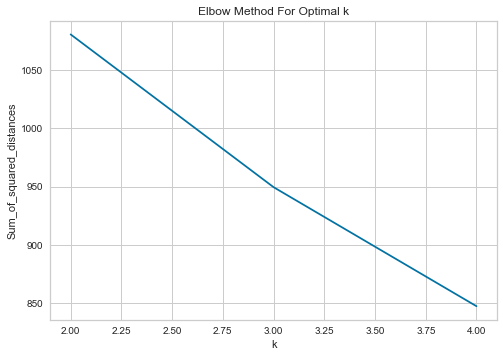

In [98]:
Sum_of_squared_distances = []
K = range(2,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_features)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'b-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

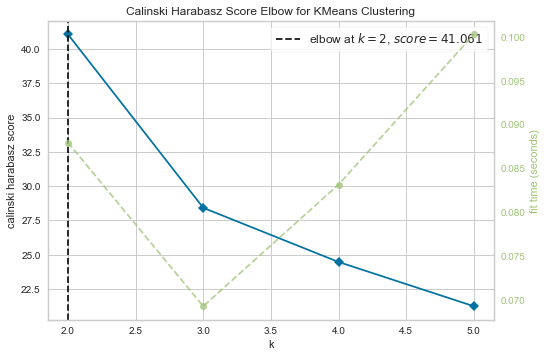

In [55]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,6),metric='calinski_harabasz', timings= True)
visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()     

In [99]:
kmeans=KMeans(n_clusters=3).fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)
y_kmeans

array([2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1])

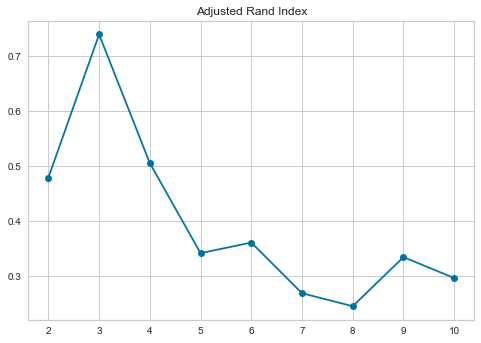

[0.47862214836077954, 0.7397916833258205, 0.5051548505875634, 0.3410092687950566, 0.36030645971031755, 0.2679289232240846, 0.24427163119064565, 0.33382493937998997, 0.29565815444718296]


In [62]:
k = [2,3,4,5,6,7,8,9,10]
scores = []
 
for n_cluster in k:
    y_pred = KMeans(n_clusters = n_cluster).fit_predict(scaled_features)
    score = metrics.adjusted_rand_score(y_kmeans, y_pred)
    scores.append(score)
 
plt.plot(k, scores, 'o-')
plt.title('Adjusted Rand Index')
plt.show()

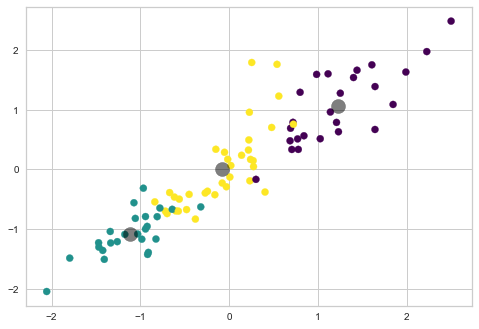

In [100]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [101]:
New_Dataset=Data
New_Dataset['Cluster']=y_kmeans+1
New_Dataset.head(12)

,Store,Total Sales,Meat_Sum,Dry_Grocery_Sum,Deli_Sum,Bakery_Sum,General_Merchandise_Sum,Dairy_Sum,Frozen_Food_Sum,Produce_Sum,...,% Meat,% Dry_Grocery,% Deli,% Bakery,% General_Merchandise,% Dairy,% Frozen_Food,% Produce,% Floral,Cluster
0,S0001,23508945.82,2531382.34,10845787.65,1023812.90,835599.06,1590570.68,2423389.38,1814872.88,2284388.70,...,0.107677,0.461347,0.043550,0.035544,0.067658,0.103084,0.077199,0.097171,0.006769,3
1,S0002,17334619.57,1991807.66,7931072.94,689786.42,514864.68,1111992.45,1844188.83,1366677.52,1755293.15,...,0.114903,0.457528,0.039792,0.029702,0.064149,0.106388,0.078841,0.101259,0.007438,2
2,S0003,30240661.99,3468989.12,12741875.44,1262874.27,1091930.44,2408831.27,3095321.58,2087437.15,3792143.03,...,0.114713,0.421349,0.041761,0.036108,0.079655,0.102356,0.069027,0.125399,0.009631,3
3,S0004,27913890.97,3565375.84,12688533.89,1166388.77,962155.82,1606208.31,2710746.38,2240847.44,2802811.88,...,0.127728,0.454560,0.041785,0.034469,0.057542,0.097111,0.080277,0.100409,0.006120,3
4,S0005,27825886.17,2834435.52,12248085.57,984736.25,629055.94,1874796.88,2957003.74,2402445.89,3648309.02,...,0.101863,0.440169,0.035389,0.022607,0.067376,0.106268,0.086339,0.131112,0.008877,3
5,S0006,34625420.87,3702008.49,15921985.74,1603464.11,1226324.72,2369201.12,3414385.76,2577624.88,3524245.59,...,0.106916,0.459835,0.046309,0.035417,0.068424,0.098609,0.074443,0.101782,0.008265,1
6,S0007,30863087.31,3553409.00,13644163.44,1428888.69,931336.01,1966428.99,3152200.12,2752056.93,3192688.95,...,0.115135,0.442087,0.046298,0.030176,0.063715,0.102135,0.089170,0.103447,0.007838,3
7,S0008,29181879.77,3118893.04,12503176.41,951990.47,653608.20,2598245.71,3173008.04,2343931.30,3609692.16,...,0.106878,0.428457,0.032623,0.022398,0.089036,0.108732,0.080321,0.123696,0.007859,3
8,S0009,40678620.31,4837013.88,17990212.13,1798155.15,1047732.42,3280983.51,4083162.02,3134343.14,4210541.86,...,0.118908,0.442252,0.044204,0.025756,0.080656,0.100376,0.077051,0.103507,0.007288,1
9,S0010,21703928.12,2325539.02,9364058.90,805192.95,825864.13,1279248.61,2495117.23,1743731.40,2639823.51,...,0.107148,0.431445,0.037099,0.038051,0.058941,0.114962,0.080342,0.121629,0.010383,2


In [102]:
print ('The Total number of Cluster 1 is:',(New_Dataset['Cluster']==1).sum())
print ('The Total number of Cluster 2 is:',(New_Dataset['Cluster']==2).sum())
print ('The Total number of Cluster 3 is:',(New_Dataset['Cluster']==3).sum())

The Total number of Cluster 1 is: 25
The Total number of Cluster 2 is: 25
The Total number of Cluster 3 is: 35


In [103]:
New_Dataset.to_csv("New Dataset.csv")

In [104]:
Cluster_Relationship=pd.read_csv("New Dataset.csv")
Cluster_Relationship
Cluster_Relationship=Cluster_Relationship.groupby(['Cluster']).agg({'Total Sales':['sum']})
Cluster_Relationship

,Total Sales
,sum
Cluster,
1,9.731880e+08
2,5.043517e+08
3,9.967942e+08
